# Generating random numbers following known pdf with python libraries

## 2D gaussian

In [1]:
import numpy as np
from scipy.stats import norm

Define the function:
$f(x,y) = g(x)h(y)$
where $g$ is gaussian (0,1) and h(0,3)

In [2]:
def f(x, y):
    return norm.pdf(x)*norm.pdf(y, loc=0, scale=3)

define a grid $100\times 100$ which will help us in plotting

In [3]:
nptx, npty = 101, 101
x_p = np.linspace(-5, 5, nptx)
y_p = np.linspace(-5, 5, npty)

With ```numpy``` we can define a [```meshgrid```](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) 
for each point of the grid it define the coordinates $x$, $y$, then we will compute $z$ as $f(x,y)$:

In [4]:
x, y = np.meshgrid(x_p, y_p)

In [5]:
z = f(x, y)

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm

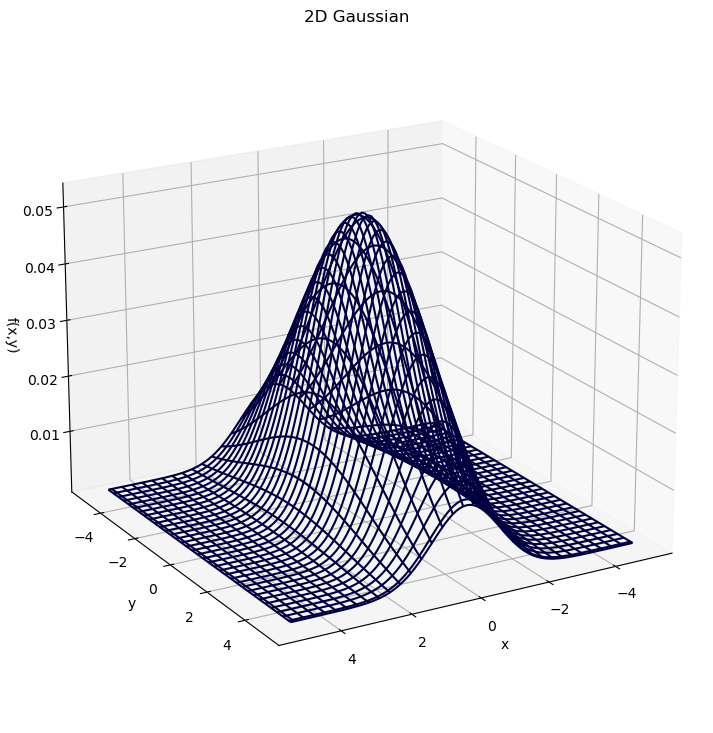

In [7]:
fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection='3d')
ax.view_init(20, 60)
ax.plot_wireframe(x, y, z, color='#000040')
ax.set_title('2D Gaussian')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.show()

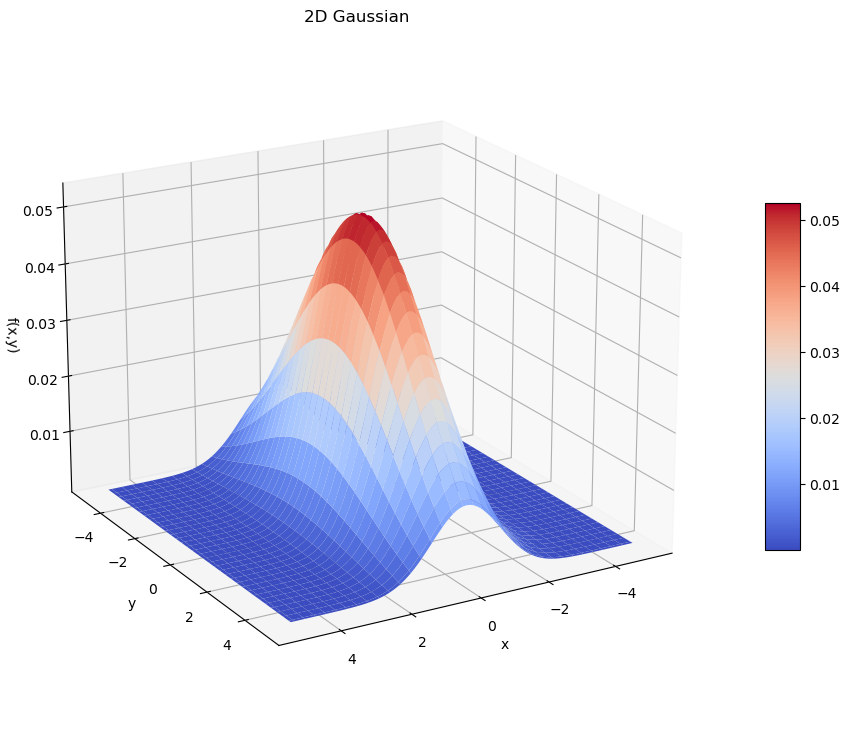

In [8]:
fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection='3d')
ax.view_init(20, 60)
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm)
ax.set_title('2D Gaussian')
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.show()

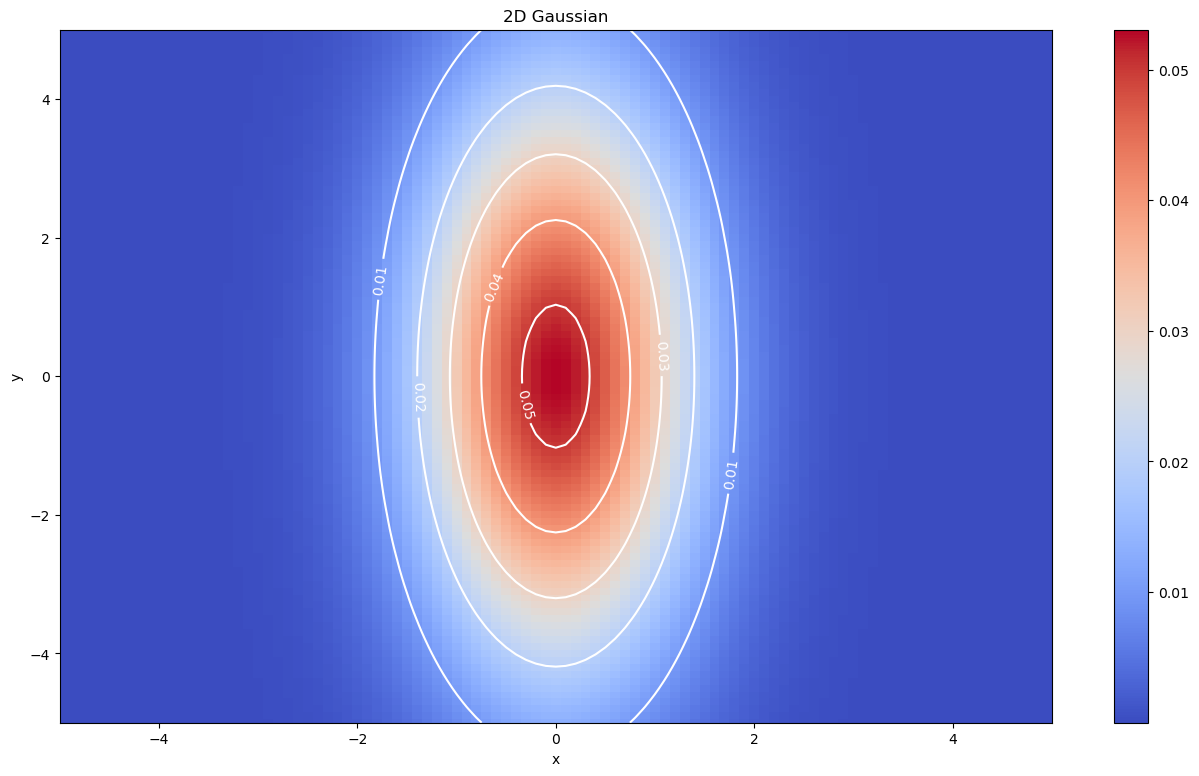

In [9]:
figure, ax = plt.subplots(figsize=(16,9))
col = ax.pcolormesh(x, y, z, cmap=cm.coolwarm, shading='auto')
con = ax.contour(x, y, z, np.arange(0, 0.13, 0.01), colors='white')
ax.clabel(con, inline=1, fontsize=10)
ax.set_title('2D Gaussian')
ax.axis([x.min(), x.max(), y.min(), y.max()])
ax.set_xlabel('x')
ax.set_ylabel('y')
figure.colorbar(col)
plt.show()

In [10]:
# marginal distribution

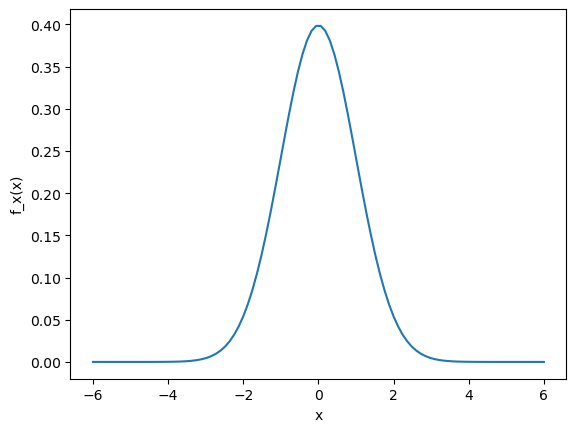

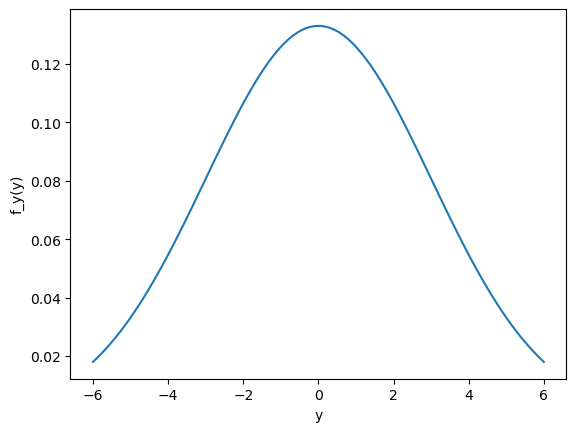

In [11]:
xp = np.linspace(-6,6,100)
g = norm.pdf(xp)
h = norm.pdf(xp, loc=0, scale=3)

plt.plot(xp, g)
plt.xlabel('x')
plt.ylabel('f_x(x)')
plt.show()
#plt.grid()

plt.plot(xp, h)
plt.xlabel('y')
plt.ylabel('f_y(y)')
plt.show()
#plt.grid()

In [12]:
# conditional distribution


$\displaystyle f(y|x_0) = \frac{f(x_0,y)}{\int f(x_0,y)\,\mathrm{d}y} = 
\frac{f(x_0,y)}{f_x(x_0)}
$

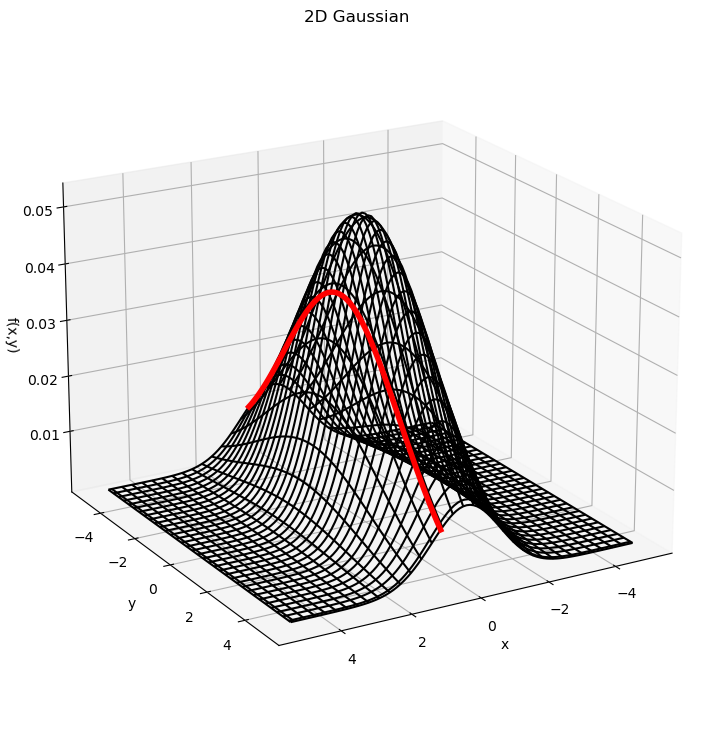

In [13]:
fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection='3d')
ax.view_init(20, 60)
ax.plot_wireframe(x, y, z, color='black')
ax.plot([0.75]*nptx, y_p, f(0.75, y_p), color='red', zorder=10, linewidth=4)
ax.set_title('2D Gaussian')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.show()


$\displaystyle  f(x|y_0) = \frac{f(x,y_0)}{\int f(x,y_0)\,\mathrm{d}x} =
\frac{f(x,y_0)}{f_y(y_0)}
$

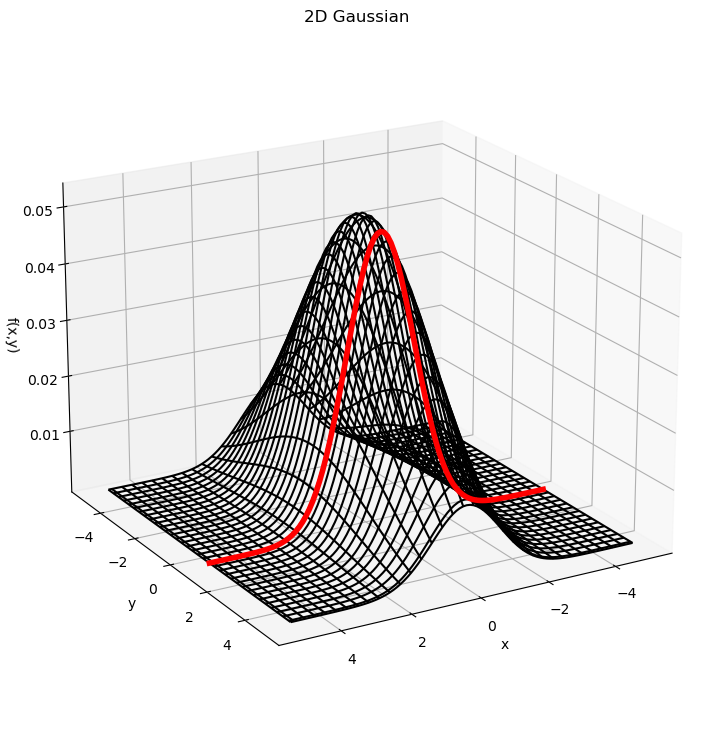

In [14]:
fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection='3d')
ax.view_init(20, 60)
ax.plot_wireframe(x, y, z, color='black')
ax.plot(x_p, [0.75]*nptx, f(x_p, 0.75), color='red', zorder=10, linewidth=4)
ax.set_title('2D Gaussian')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.show()

In the previous graph we showed the conditional distribution **not** normalized, for graphical reasons. That is, we show $f(x_0,y)$ and not $f(y|x_0)$, which should be multiplied by a normalization factor $1/f_x(x_0)$.

## making some correlation

In [15]:
sx, sy = 1, 3
def g2d(x, y):
    return norm.pdf(x, scale=sx)*norm.pdf(y, scale=sy)
x, y = np.meshgrid(np.linspace(-5, 5, 101), np.linspace(-5, 5, 101))
z = g2d(x, y)

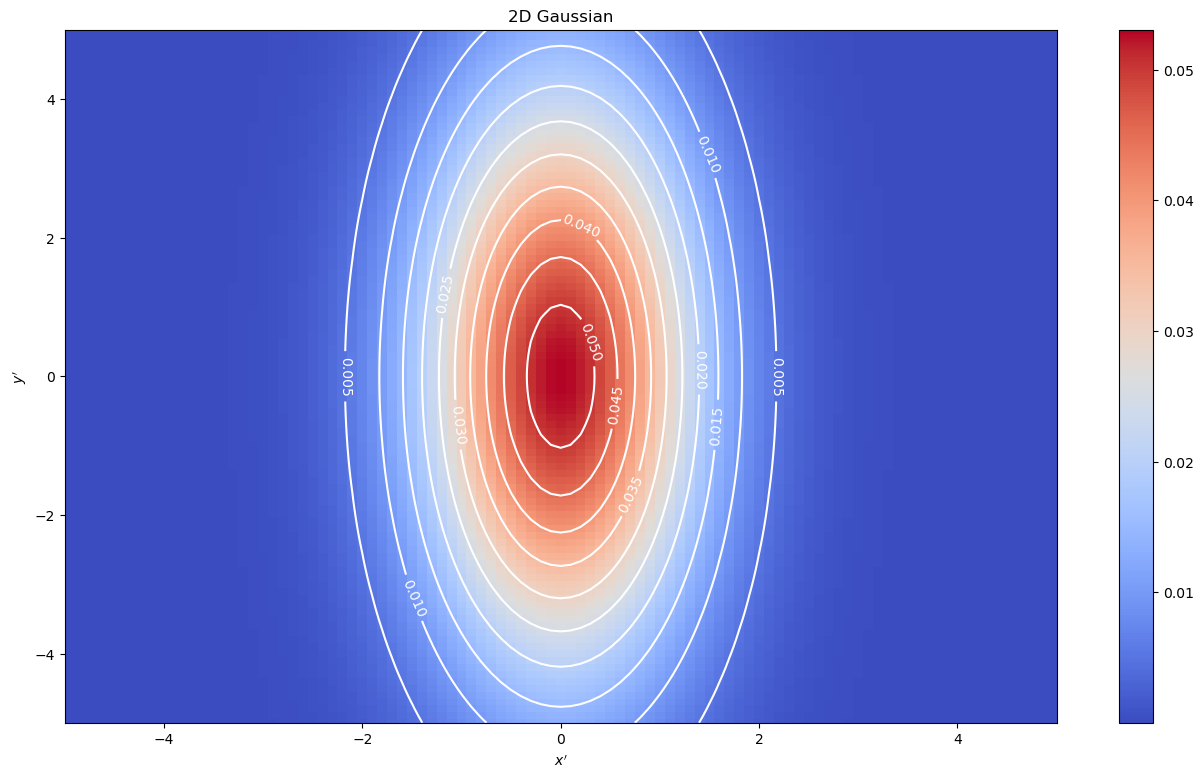

In [16]:
figure, ax = plt.subplots(figsize=(16,9))
col = ax.pcolormesh(x, y, z, cmap=cm.coolwarm, vmin=z.min(), vmax=z.max(), shading='auto')
con = ax.contour(x, y, z, np.arange(0, 0.09, 0.005), colors='white')
ax.clabel(con, inline=1, fontsize=10)
ax.set_title('2D Gaussian')
ax.axis([x.min(), x.max(), y.min(), y.max()])
ax.set_xlabel('$x^\prime$')
ax.set_ylabel('$y^\prime$')
figure.colorbar(col)
plt.show()

lets take a rotation of an angle $\phi$:

$\displaystyle R(\phi) = \left(\begin{array}{cc}\cos\phi & -\sin\phi \\ \sin\phi & \cos\phi\end{array}\right)$

$\displaystyle \left(\begin{array}{c}x^\prime\\y^\prime\end{array}\right) = 
R(\phi)
\left(\begin{array}{c}x\\y\end{array}\right) = 
\left(\begin{array}{c}x^\prime\\y^\prime\end{array}\right) = 
\left(\begin{array}{cc}\cos\phi & -\sin\phi \\ \sin\phi & \cos\phi\end{array}\right)
\left(\begin{array}{c}x\\y\end{array}\right) =
\left(\begin{array}{c}x\cos\phi -y\sin\phi\\x\sin\phi +y\cos\phi\end{array}\right)
$ 

we will use $R^{-1}(\phi) = R(-\phi)$ since we want move from $(x^\prime, y^\prime)$ to $(x, y)$.
So we have to change sign to $\phi$.

In [17]:
import math
phi = -math.pi/6
s, c = math.sin(phi), math.cos(phi)
rot = np.array([[c, -s], [s, c]])

In [18]:
rot

array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])

In [19]:
v = [0.9, 0.1]
np.matmul(rot,v)

array([ 0.82942286, -0.36339746])

In [20]:
def g2dr(x, y, rot_mat=rot):
    return g2d(*np.matmul(rot_mat,[x, y]))

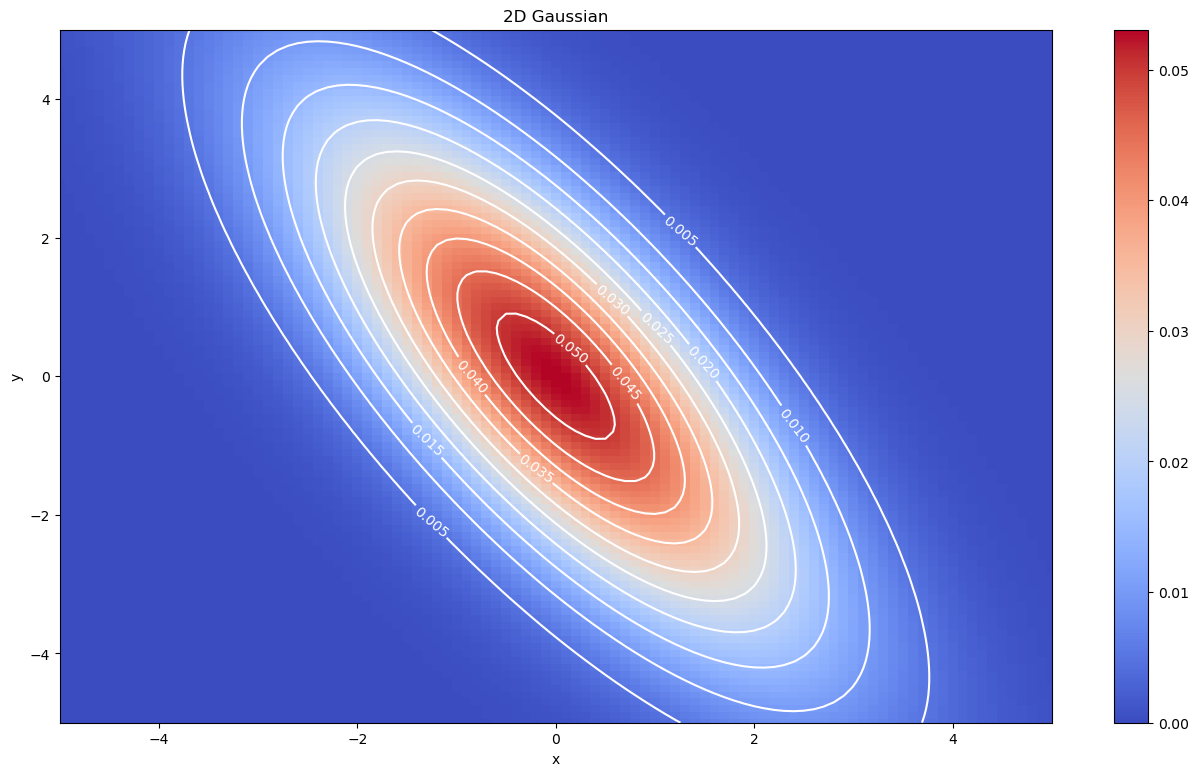

In [21]:
z = (np.vectorize(g2dr))(x, y)

figure, ax = plt.subplots(figsize=(16,9))
col = ax.pcolormesh(x, y, z, cmap=cm.coolwarm, vmin=z.min(), vmax=z.max(),shading='auto')
con = ax.contour(x, y, z, np.arange(0, 0.09, 0.005), colors='white')
ax.clabel(con, inline=1, fontsize=10)
ax.set_title('2D Gaussian')
ax.axis([x.min(), x.max(), y.min(), y.max()])
ax.set_xlabel('x')
ax.set_ylabel('y')
figure.colorbar(col)
plt.show()

In [22]:
from scipy.stats import norm
from matplotlib import patches

In [23]:
sigma_x1, sigma_y1 = 1, 3
x1 = norm.rvs(scale=sigma_x1, size=10000)
y1 = norm.rvs(scale=sigma_y1, size=10000)

C:\Users\utente\AppData\Local\Temp\ipykernel_27380\4081687665.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


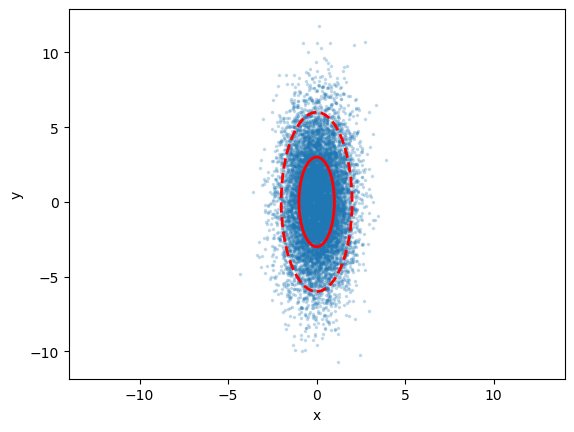

In [24]:
plt.scatter(x1,y1, marker='.', s=10, alpha=0.2)
ax = plt.gca()
e1 = patches.Ellipse((0, 0), 2*sigma_x1, 2*sigma_y1, angle=0, linewidth=2, color='r', fill=False, zorder=3)
e2 = patches.Ellipse((0, 0), 4*sigma_x1, 4*sigma_y1, angle=0, linewidth=2, color='r', linestyle='--', fill=False, zorder=3)
ax.add_patch(e1)
ax.add_patch(e2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-14, 14)
fig.show()

In [25]:
phi_deg = 30
phi = phi_deg/180*math.pi
s, c = math.sin(phi), math.cos(phi)
x = c*x1 - s*y1
y = s*x1 + c*y1

C:\Users\utente\AppData\Local\Temp\ipykernel_27380\1134338532.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


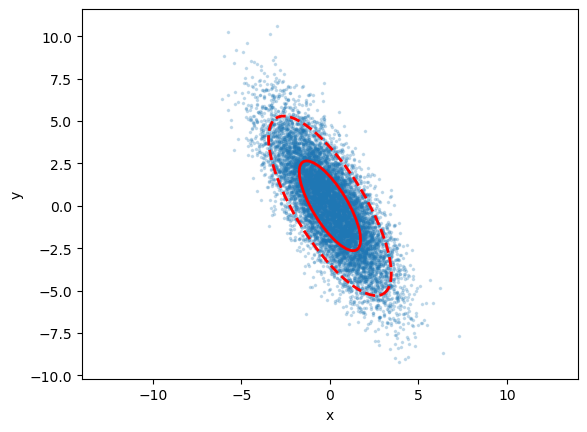

In [26]:
plt.scatter(x,y, marker='.', s=10, alpha=0.2)
ax = plt.gca()
e1 = patches.Ellipse((0, 0), 2*sigma_x1, 2*sigma_y1, angle=phi_deg, linewidth=2, color='r', fill=False, zorder=3)
e2 = patches.Ellipse((0, 0), 4*sigma_x1, 4*sigma_y1, angle=phi_deg, linewidth=2, color='r', linestyle='--', fill=False, zorder=3)
ax.add_patch(e1)
ax.add_patch(e2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-14, 14)

fig.show()

In [27]:
sigma_x = math.sqrt((c*sigma_x1)**2+(s*sigma_y1)**2) #from error propagation
sigma_y = math.sqrt((s*sigma_x1)**2+(c*sigma_y1)**2) #from error propagation

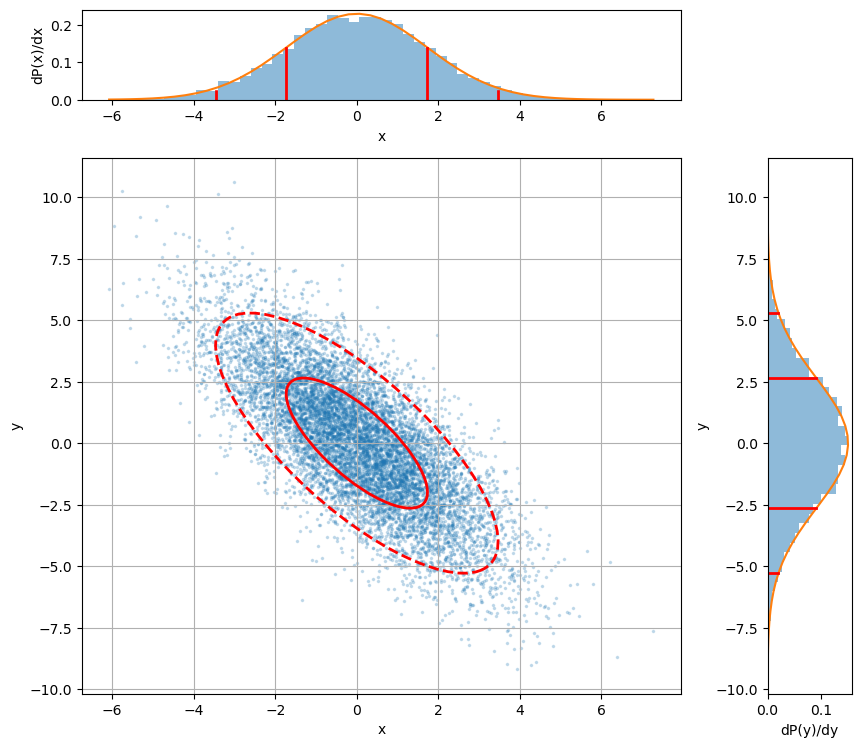

In [28]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(10, 12)
ax0 = plt.subplot(gs[6:10, 5:9])
axx = plt.subplot(gs[5:6, 5:9])
axy = plt.subplot(gs[6:10, 9:10])

ax0.scatter(x,y, marker='.', s=10, alpha=0.2)
ee1 = patches.Ellipse((0, 0), 2*sigma_x1, 2*sigma_y1, angle=phi_deg, linewidth=2, color='r', fill=False, zorder=3)
ee2 = patches.Ellipse((0, 0), 4*sigma_x1, 4*sigma_y1, angle=phi_deg, linewidth=2, color='r', linestyle='--', fill=False, zorder=3)
ax0.add_patch(ee1)
ax0.add_patch(ee2)

nx, binsx, px = axx.hist(x,50, density=True, alpha=0.5)
axx.plot(binsx, norm.pdf(binsx,scale=sigma_x))
axx.plot([sigma_x, sigma_x], [0, norm.pdf(sigma_x,scale=sigma_x)], color='r',linewidth=2)
axx.plot([-sigma_x, -sigma_x], [0, norm.pdf(sigma_x,scale=sigma_x)], color='r',linewidth=2)
axx.plot([2*sigma_x, 2*sigma_x], [0, norm.pdf(2*sigma_x,scale=sigma_x)], color='r',linewidth=2, linestyle='--')
axx.plot([-2*sigma_x, -2*sigma_x], [0, norm.pdf(2*sigma_x,scale=sigma_x)], color='r',linewidth=2, linestyle='--')

ny, binsy, py = axy.hist(y,50, density=True, orientation='horizontal', alpha=0.5)
axy.plot(norm.pdf(binsy,scale=sigma_y), binsy)
axy.plot([0, norm.pdf(sigma_y,scale=sigma_y)], [sigma_y, sigma_y], color='r',linewidth=2)
axy.plot([0, norm.pdf(sigma_y,scale=sigma_y)], [-sigma_y, -sigma_y], color='r',linewidth=2)
axy.plot([0, norm.pdf(2*sigma_y,scale=sigma_y)], [2*sigma_y, 2*sigma_y], color='r',linewidth=2)
axy.plot([0, norm.pdf(2*sigma_y,scale=sigma_y)], [-2*sigma_y, -2*sigma_y], color='r',linewidth=2)

ax0.set_xlabel('x')
ax0.set_ylabel('y')
ax0.grid()
axx.set_xlabel('x')
axx.set_ylabel('dP(x)/dx')
axy.set_ylabel('y')
axy.set_xlabel('dP(y)/dy')
fig.tight_layout()
plt.show()

In [29]:
for z in [1, 2, 3]:
    p_1D = norm.cdf(z)-norm.cdf(-z)
    p_2D = 1 - math.exp(-z**2/2)
    print('{:.2f}σ - 1D: {:.5f}; 2D: {:.5f}'.format(z, p_1D, p_2D))

1.00σ - 1D: 0.68269; 2D: 0.39347
2.00σ - 1D: 0.95450; 2D: 0.86466
3.00σ - 1D: 0.99730; 2D: 0.98889


In general, when showing 2D graphs with ellipsoids labeled $1\sigma$, $2\sigma$, $3\sigma$, etc., their probability content is **not** meant to be 68.3%, 95.5% , 99.7% etc., but that these are instead the probabilities corresponding to each of the **projections** 1D.



## correlation

In [43]:
sigma_x1, sigma_y1 = 1, 3
x1 = norm.rvs(scale=sigma_x1, size=100000)
y1 = norm.rvs(scale=sigma_y1, size=100000)
phi_deg = 30
phi = phi_deg/180*math.pi
s, c = math.sin(phi), math.cos(phi)
x = c*x1 - s*y1
y = s*x1 + c*y1

In [44]:
np.std(x1)

0.9999898513686333

In [45]:
np.std(y1)

2.9982524820325867

In [46]:
np.cov(x1,y1)

array([[9.99989703e-01, 6.43412467e-03],
       [6.43412467e-03, 8.98960784e+00]])

In [47]:
np.corrcoef(x1,y1)

array([[1.        , 0.00214596],
       [0.00214596, 1.        ]])

In [48]:
np.std(y)

2.645317645372136

In [49]:
np.std(x)

1.7296797980949097

In [50]:
np.cov(x,y)

array([[ 2.99182212, -3.45638908],
       [-3.45638908,  6.99777542]])

In [51]:
np.corrcoef(x,y)

array([[ 1.       , -0.7553961],
       [-0.7553961,  1.       ]])

# multivariate normal with ```scipy```

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [53]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm

In [66]:
rv = multivariate_normal([0, 0], [[ 2.99182212, -3.45638908],[-3.45638908,  6.99777542]])

In [67]:
nptx, npty = 101, 101
x_p = np.linspace(-4, 4, nptx)
y_p = np.linspace(-3, 3, npty)

x, y = np.meshgrid(x_p, y_p)
pos = np.dstack((x, y))

In [68]:
z = rv.pdf(pos)

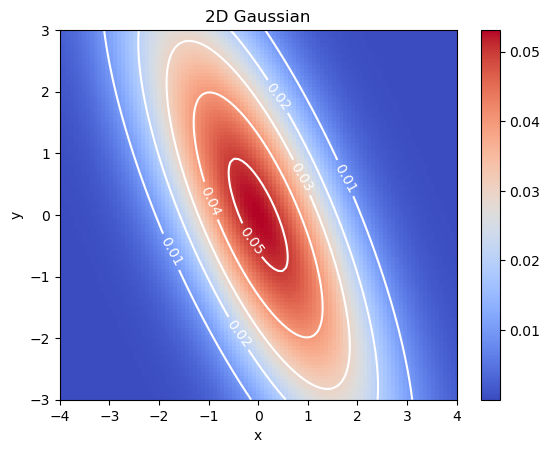

In [69]:
figure, ax = plt.subplots()
col = ax.pcolormesh(x, y, z, cmap=cm.coolwarm, shading='auto')
con = ax.contour(x, y, z, np.arange(0, 0.13, 0.01), colors='white')
ax.clabel(con, inline=1, fontsize=10)
ax.set_title('2D Gaussian')
ax.axis([x.min(), x.max(), y.min(), y.max()])
ax.set_xlabel('x')
ax.set_ylabel('y')
figure.colorbar(col)
plt.show()

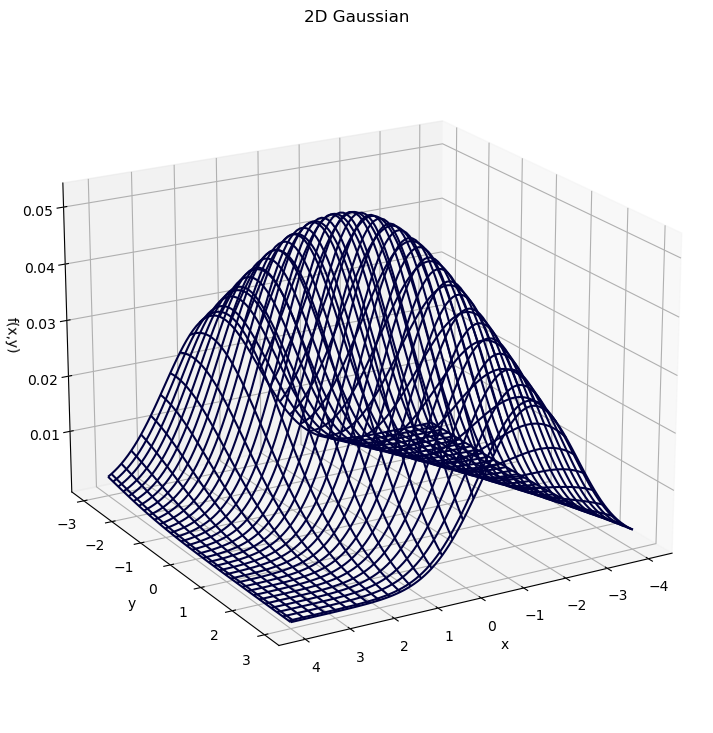

In [70]:
fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection='3d')
ax.view_init(20, 60)
ax.plot_wireframe(x, y, z, color='#000040')
ax.set_title('2D Gaussian')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.show()

In [71]:
r = rv.rvs(size=10000)

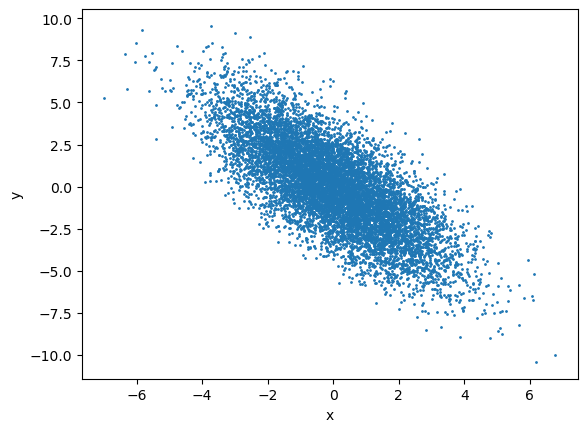

In [72]:
plt.scatter(r.T[0], r.T[1], s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

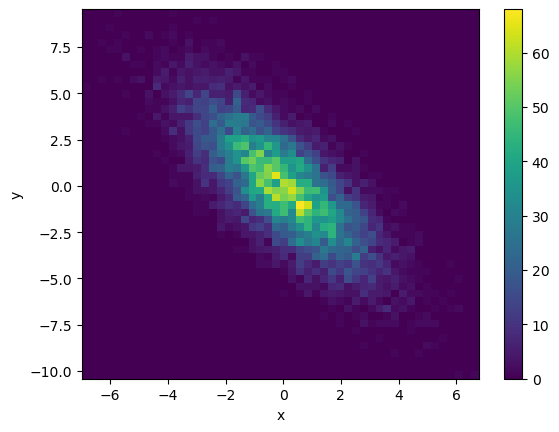

In [73]:
plt.hist2d(r.T[0], r.T[1], bins=50)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

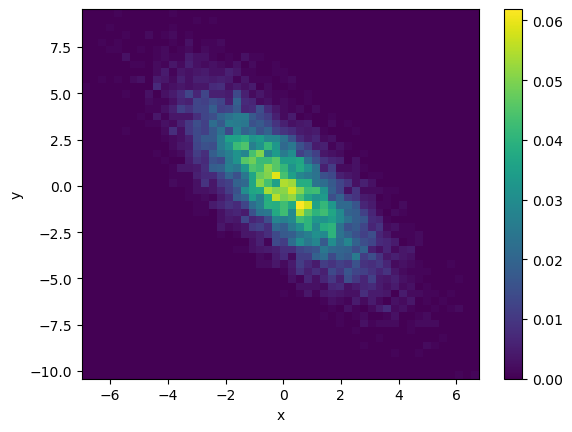

In [74]:
plt.hist2d(r.T[0], r.T[1], bins=50, density=True)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [75]:
np.mean(r.T[0])

0.0021120536738965284

In [76]:
np.mean(r.T[1])

-0.0030613600902059815

In [77]:
np.cov(r.T[0], r.T[1])

array([[ 2.9971486 , -3.43191925],
       [-3.43191925,  7.02500359]])